In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)


In [2]:
df = pd.read_csv('C:/Users/kavya/Desktop/sample_expenses_1000.csv')  # Load your dataset file
df.head()


,Date,Description,Amount,Type
0,2025-06-06,Pharmacy medicines,4345.19,Debit
1,2025-06-25,Daily fruit shop,13471.91,Debit
2,2025-05-30,Internet bill,8370.71,Debit
3,2025-05-01,Train ticket to Delhi,13911.45,Debit
4,2025-05-23,Book from Amazon,11341.44,Debit


In [3]:
def categorize(description):
    desc = description.lower()
    if any(keyword in desc for keyword in ['pharmacy', 'medical store', 'doctor', 'consultation']):
        return 'Medical'
    elif any(keyword in desc for keyword in ['fruit', 'vegetables', 'big bazaar', 'grocery']):
        return 'Groceries'
    elif any(keyword in desc for keyword in ['netflix', 'youtube', 'book', 'headphones', 'amazon']):
        return 'Subscriptions & Books'
    elif any(keyword in desc for keyword in ['train', 'taxi', 'ola', 'uber', 'auto rickshaw']):
        return 'Transportation'
    elif any(keyword in desc for keyword in ['lunch', 'dinner', 'snacks', 'zomato', 'starbucks', 'ice cream', 'cinema']):
        return 'Food & Dining'
    elif any(keyword in desc for keyword in ['petrol', 'diesel', 'cng']):
        return 'Fuel'
    elif 'rent' in desc:
        return 'Rent'
    elif 'recharge' in desc:
        return 'Mobile Recharge'
    elif any(keyword in desc for keyword in ['h&m', 'myntra', 'jeans', 't-shirt']):
        return 'Clothing'
    elif 'udemy' in desc:
        return 'Education'
    else:
        return 'Others'


In [4]:
df['Category'] = df['Description'].apply(categorize)
df.head()


,Date,Description,Amount,Type,Category
0,2025-06-06,Pharmacy medicines,4345.19,Debit,Medical
1,2025-06-25,Daily fruit shop,13471.91,Debit,Groceries
2,2025-05-30,Internet bill,8370.71,Debit,Others
3,2025-05-01,Train ticket to Delhi,13911.45,Debit,Transportation
4,2025-05-23,Book from Amazon,11341.44,Debit,Subscriptions & Books


In [5]:
df.to_csv('categorized_expenses.csv', index=False)
print('File saved as categorized_expenses.csv')


File saved as categorized_expenses.csv


In [6]:
category_summary = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_summary = category_summary.reset_index()
category_summary


,Category,Amount
0,Food & Dining,1289095.46
1,Subscriptions & Books,886767.20
2,Others,875356.30
3,Rent,720462.88
4,Medical,711600.97
5,Groceries,705624.83
6,Transportation,691541.54
7,Fuel,504593.60
8,Clothing,396331.88
9,Mobile Recharge,334516.72


In [7]:
top_category = category_summary.iloc[0]
print(f"The category with the highest spending is **{top_category['Category']}**, totaling ₹{top_category['Amount']:.2f}")


The category with the highest spending is **Food & Dining**, totaling ₹1289095.46


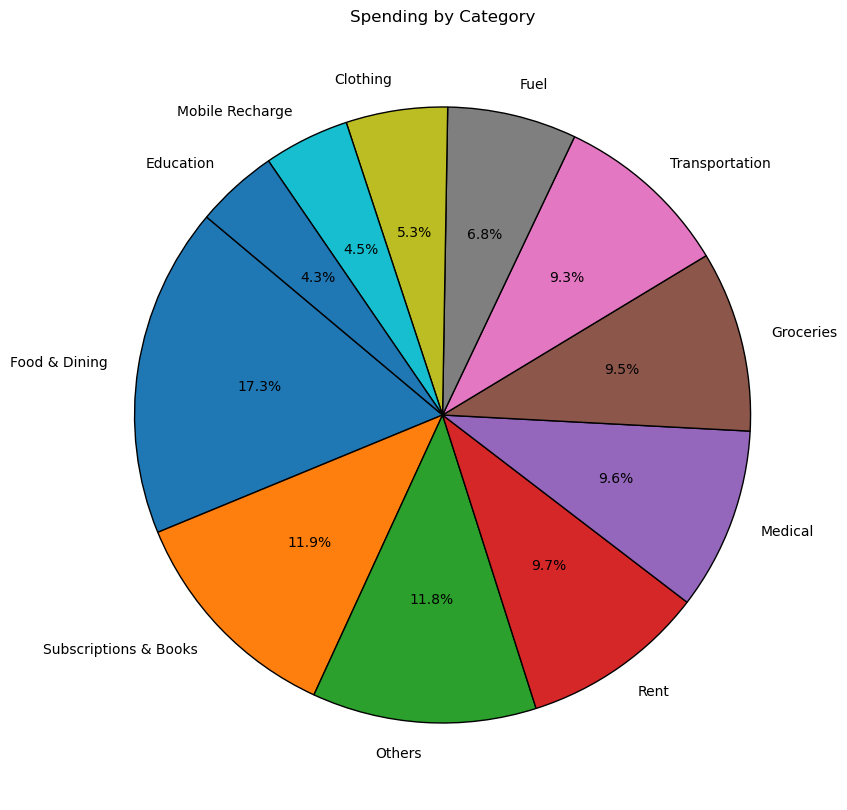

In [8]:
# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    category_summary['Amount'],
    labels=category_summary['Category'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Spending by Category')
plt.show()
